<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/116_QSAR_DANILO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vamos a realizar un análisis de componentes principales (PCA) y luego implementaremos un modelo de regresión utilizando machine learning. Primero, importemos las bibliotecas necesarias y carguemos los datos:**

# **1. Importamos las librerias a Usar**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# **2. Invocamos nuestra base de datos**

In [ ]:
df=pd.read_csv("/content/DaniloQSAR2.csv",delimiter=',')

In [ ]:
df.head()

,Name,PIc50,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,1,7.301030,0,2.9952,8.971223,100.2861,48.003895,17,18,37,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,2,5.309804,0,1.7571,3.087400,95.0785,45.047309,17,18,35,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,3,5.455932,0,1.6435,2.701092,87.1337,40.193723,17,18,31,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,4,5.795880,0,1.7982,3.233523,92.0439,43.397102,17,18,34,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5,5.301030,0,3.9209,15.373457,106.6333,50.438723,17,18,40,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158


In [ ]:
df = df.drop('Name', axis=1)
df

,Ic50,Pic50,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.050,7.301030,0,2.9952,8.971223,100.2861,48.003895,17,18,37,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,4.900,5.309804,0,1.7571,3.087400,95.0785,45.047309,17,18,35,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,3.500,5.455932,0,1.6435,2.701092,87.1337,40.193723,17,18,31,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,1.600,5.795880,0,1.7982,3.233523,92.0439,43.397102,17,18,34,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5.000,5.301030,0,3.9209,15.373457,106.6333,50.438723,17,18,40,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158
5,3.300,5.481486,0,4.4705,19.985370,100.5456,46.543137,17,18,36,...,11.722442,54.121289,2.004492,26.247091,0.000000,6.298731,1921,41,4.238,146
6,2.900,5.537602,0,4.3032,18.517530,97.8711,44.580930,17,18,34,...,10.882807,48.642859,2.026786,21.965623,2.959357,6.281043,1594,31,3.970,126
7,5.900,5.229148,0,3.5680,12.730624,95.3311,43.778930,17,18,33,...,10.727895,46.634095,2.027569,19.041891,0.000000,6.277235,1379,32,3.358,122
8,23.500,4.628932,0,3.4029,11.579728,99.5490,44.041137,17,18,30,...,11.798507,42.852470,2.040594,16.936520,0.000000,6.265147,1027,28,3.632,110
9,7.300,5.136677,0,1.6683,2.783225,103.4036,48.805895,17,18,38,...,9.106691,46.902316,2.039231,17.514386,5.597815,6.290554,1321,33,2.958,118


# **3. Tipos de variables de nuestro DataFrame**

In [ ]:
df.dtypes

Ic50      float64
Pic50     float64
nAcid       int64
ALogP     float64
ALogp2    float64
           ...   
WTPT-5    float64
WPATH       int64
WPOL        int64
XLogP     float64
Zagreb      int64
Length: 977, dtype: object

# **4. Encuentra las columnas con todos los valores cero**

In [ ]:
# **4. Encuentra las columnas con todos los valores cero**
columnas_ceros = df.columns[(df == 0).all()]

print("Columnas con todos los valores cero:")
print(columnas_ceros)

Columnas con todos los valores cero:
Index(['nAcid', 'nB'], dtype='object')


# **5. Elimina las columnas con todos los valores cero**

In [ ]:
df = df.drop(['nAcid', 'nBondsT', 'nBondsQ', 'C1SP1', 'C2SP1', 'nwHBd', 'nHdCH2',
       'nHdsCH', 'nHCHnX', 'SwHBd', 'SHdNH', 'SHsSH', 'minHmisc', 'maxHmisc'], axis=1)
df.head()

,PIc50,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,7.301030,2.9952,8.971223,100.2861,48.003895,17,18,37,22,15,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,5.309804,1.7571,3.087400,95.0785,45.047309,17,18,35,22,13,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,5.455932,1.6435,2.701092,87.1337,40.193723,17,18,31,20,11,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,5.795880,1.7982,3.233523,92.0439,43.397102,17,18,34,20,14,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5.301030,3.9209,15.373457,106.6333,50.438723,17,18,40,29,11,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158


# **6. Será que nuestra base de datos tiene datos perdidos**

In [ ]:
## **a. Será que nuestra base de datos tiene datos perdidos**
df.isnull().values.any()

True

# **7. ¿Cuántos NaN hay?**

In [ ]:
# **7. ¿Cuántos NaN hay?**
df[df.isna().any(axis=1)] # Ninguno

,PIc50,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,7.301030,2.9952,8.971223,100.2861,48.003895,17,18,37,22,15,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,5.309804,1.7571,3.087400,95.0785,45.047309,17,18,35,22,13,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
4,5.301030,3.9209,15.373457,106.6333,50.438723,17,18,40,29,11,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158
5,5.481486,4.4705,19.985370,100.5456,46.543137,17,18,36,27,9,...,11.722442,54.121289,2.004492,26.247091,0.000000,6.298731,1921,41,4.238,146
6,5.537602,4.3032,18.517530,97.8711,44.580930,17,18,34,24,10,...,10.882807,48.642859,2.026786,21.965623,2.959357,6.281043,1594,31,3.970,126
7,5.229148,3.5680,12.730624,95.3311,43.778930,17,18,33,23,10,...,10.727895,46.634095,2.027569,19.041891,0.000000,6.277235,1379,32,3.358,122
10,5.236572,1.6683,2.783225,103.4036,48.805895,17,18,38,23,15,...,9.106691,46.900867,2.039168,17.503677,5.592545,6.285847,1343,33,2.958,118
23,6.649752,2.9827,8.896499,99.9797,49.474481,17,18,40,23,17,...,8.202614,46.532053,2.023133,14.383035,2.499713,6.261784,1283,36,2.479,122
38,5.387216,0.9668,0.934702,108.0156,60.198618,11,11,51,25,26,...,6.944639,52.603725,2.104149,12.172422,2.782744,6.303526,1533,41,4.524,146
39,6.537602,1.7951,3.222384,111.5416,63.292204,11,11,54,26,28,...,6.818375,54.274072,2.087464,11.882636,2.503193,6.294623,1658,45,4.565,154


# **8. Por variables cuantos NaN hay**

In [ ]:
# **8. Por variables cuantos NaN hay**
df.isnull().sum()

PIc50     0
ALogP     0
ALogp2    0
AMR       0
apol      0
         ..
WTPT-5    0
WPATH     0
WPOL      0
XLogP     0
Zagreb    0
Length: 1014, dtype: int64

# **9. Ahora dime donde se encuentran los datos faltantes**

In [ ]:
##**9. Ahora dime donde se encuentran los datos faltantes**
for i in df.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}"
    .format(len(df[df[i].isna()]), np.round(len(df[df[i].isna()])/len(df)*100,1), i))


Hay 0 (0.0%) datos faltantes en la columna PIc50
Hay 0 (0.0%) datos faltantes en la columna ALogP
Hay 0 (0.0%) datos faltantes en la columna ALogp2
Hay 0 (0.0%) datos faltantes en la columna AMR
Hay 0 (0.0%) datos faltantes en la columna apol
Hay 0 (0.0%) datos faltantes en la columna naAromAtom
Hay 0 (0.0%) datos faltantes en la columna nAromBond
Hay 0 (0.0%) datos faltantes en la columna nAtom
Hay 0 (0.0%) datos faltantes en la columna nHeavyAtom
Hay 0 (0.0%) datos faltantes en la columna nH
Hay 0 (0.0%) datos faltantes en la columna nC
Hay 0 (0.0%) datos faltantes en la columna nN
Hay 0 (0.0%) datos faltantes en la columna nO
Hay 0 (0.0%) datos faltantes en la columna nS
Hay 0 (0.0%) datos faltantes en la columna nCl
Hay 0 (0.0%) datos faltantes en la columna nX
Hay 0 (0.0%) datos faltantes en la columna ATS0m
Hay 0 (0.0%) datos faltantes en la columna ATS1m
Hay 0 (0.0%) datos faltantes en la columna ATS2m
Hay 0 (0.0%) datos faltantes en la columna ATS3m
Hay 0 (0.0%) datos faltantes

# **10. Informacion acerca de los datos faltantes**
## Hay 1 (1.7%) datos faltantes en la columna nHBint10
## Hay 26 (43.3%) datos faltantes en la columna MolIP

# **11. Eliminamos la columna con muchos datos Faltantes**

In [ ]:
df = df.drop('MolIP', axis=1)
df.head()

,PIc50,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,7.301030,2.9952,8.971223,100.2861,48.003895,17,18,37,22,15,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,5.309804,1.7571,3.087400,95.0785,45.047309,17,18,35,22,13,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,5.455932,1.6435,2.701092,87.1337,40.193723,17,18,31,20,11,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,5.795880,1.7982,3.233523,92.0439,43.397102,17,18,34,20,14,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5.301030,3.9209,15.373457,106.6333,50.438723,17,18,40,29,11,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158


# **12. Eliminamos la columna con muchos ceros y un dato faltante**

In [ ]:
df["nHBint10"].sum()

3.0

In [ ]:
df = df.drop('nHBint10', axis=1)
df.head()

,PIc50,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,7.301030,2.9952,8.971223,100.2861,48.003895,17,18,37,22,15,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,5.309804,1.7571,3.087400,95.0785,45.047309,17,18,35,22,13,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,5.455932,1.6435,2.701092,87.1337,40.193723,17,18,31,20,11,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,5.795880,1.7982,3.233523,92.0439,43.397102,17,18,34,20,14,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5.301030,3.9209,15.373457,106.6333,50.438723,17,18,40,29,11,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158


# **13. Exportar dataframes limpios**

In [ ]:
# **13. Exportar dataframes limpios**
df.to_csv('df2_datos_LIMPIOS.csv',index=False)

# **14. Trabajamos con los datos Limpios**

In [ ]:
df2=pd.read_csv("/content/df2_datos_LIMPIOS.csv",delimiter=',')
df2.head()

,PIc50,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,7.301030,2.9952,8.971223,100.2861,48.003895,17,18,37,22,15,...,8.920523,44.693921,2.031542,14.391767,2.508096,6.262087,1154,32,2.759,116
1,5.309804,1.7571,3.087400,95.0785,45.047309,17,18,35,22,13,...,8.916379,44.863029,2.039229,14.318525,2.417667,6.276958,1223,30,1.812,114
2,5.455932,1.6435,2.701092,87.1337,40.193723,17,18,31,20,11,...,9.227665,41.003857,2.050193,14.408729,2.523537,6.265641,917,26,1.936,104
3,5.795880,1.7982,3.233523,92.0439,43.397102,17,18,34,20,14,...,8.296550,41.168420,2.058421,12.149770,2.784403,6.265528,921,26,2.352,102
4,5.301030,3.9209,15.373457,106.6333,50.438723,17,18,40,29,11,...,11.300462,57.839839,1.994477,28.577222,2.505237,6.283032,2501,50,4.262,158


In [ ]:
correlacion1 = df2['ATS1v'].corr(df2['AATSC8v'])
correlacion2 = df2['ATS1v'].corr(df2['AATSC5i'])
correlacion3 = df2['ATS1v'].corr(df2['nBonds'])
correlacion4 = df2['ATS1v'].corr(df2['SP-2'])
correlacion5 = df2['ATS1v'].corr(df2['MPC2'])
correlacion6 = df2['ATS1v'].corr(df2['SRW4'])
print("corr(ATS1v,AATSC8v):", correlacion1)
print("corr(ATS1v,AATSC5i):", correlacion2)
print("corr(ATS1v,nBonds):", correlacion3)
print("corr(ATS1v,SP-2):", correlacion4)
print("corr(ATS1v,MPC2):", correlacion5)
print("corr(ATS1v,SRW4):", correlacion6)
#print("ATS1v", "AATSC8v", "AATSC5i", "nBonds", "SP-2", "MPC2", "SRW4", "WPOL")

corr(ATS1v,AATSC8v): 0.3971420895592691
corr(ATS1v,AATSC5i): -0.6564960109503439
corr(ATS1v,nBonds): 0.9251910284158508
corr(ATS1v,SP-2): 0.8468697978914477
corr(ATS1v,MPC2): 0.9224286285257719
corr(ATS1v,SRW4): 0.9236512351396827


# **15. Normalizar los datos**

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df2.drop('PIc50', axis=1)
y = df2['PIc50']

# Normalizar los datos
X_normalized = (X - X.mean()) / X.std()


In [ ]:
df2_N = X_normalized

In [ ]:
df2_N.describe()

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,7.401487e-18,1.406282e-16,1.091719e-16,-8.086124e-16,2.072416e-16,-8.160139e-16,-2.794061e-16,-9.806970e-17,1.413221e-16,4.681440e-16,...,-5.088522e-16,-9.159340e-16,-1.757969e-14,-1.008453e-16,1.519979e-16,3.700743e-17,7.216450e-17,4.810966e-17,6.106227e-16,-3.053113e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.162161e+00,-1.109713e+00,-3.382563e+00,-1.843801e+00,-2.967367e+00,-2.969364e+00,-1.375799e+00,-2.430960e+00,-9.999864e-01,-2.225671e+00,...,-2.101961e+00,-2.483177e+00,-2.640355e+00,-1.139607e+00,-1.516335e+00,-5.544518e-01,-1.884872e+00,-1.939561e+00,-1.613963e+00,-1.845973e+00
25%,-5.464670e-01,-5.919229e-01,-5.831049e-01,-5.794311e-01,3.399151e-01,3.386807e-01,-6.516944e-01,-6.412961e-01,-5.199929e-01,-5.494333e-01,...,-6.186909e-01,-6.335685e-01,-4.509558e-01,-3.736297e-01,-1.388906e-02,-5.023983e-01,-5.880171e-01,-6.843751e-01,-7.365634e-01,-6.228742e-01
50%,-1.790508e-01,-3.338963e-01,3.316510e-02,-2.852868e-01,3.399151e-01,3.386807e-01,-2.896420e-01,-1.938802e-01,-2.799962e-01,-5.494333e-01,...,-7.391659e-02,-2.297695e-01,7.957760e-02,-3.634975e-01,-3.139199e-03,-4.994835e-01,-2.652975e-01,-1.464383e-01,-1.213042e-01,-2.151747e-01
75%,5.617267e-01,3.443874e-01,6.129379e-01,2.835634e-01,3.399151e-01,3.386807e-01,2.986933e-01,2.535357e-01,1.999973e-01,5.680582e-01,...,5.414395e-01,2.193575e-01,9.253659e-02,3.894530e-01,2.740365e-03,-4.772414e-01,3.173908e-01,3.914984e-01,4.202472e-01,1.925248e-01
max,2.804378e+00,3.685958e+00,2.743510e+00,3.417642e+00,3.399151e-01,3.386807e-01,3.511909e+00,3.385447e+00,3.559952e+00,3.361787e+00,...,2.086308e+00,3.045290e+00,2.892094e+00,3.819750e+00,2.900319e+00,3.897410e+00,4.145204e+00,3.619119e+00,2.397712e+00,3.046421e+00


# **15. Hallemos la Matriz de correlaciones de nuestra Data**

In [ ]:
# **b. Vamos hallar la Matriz de Correlaciones de nuestra data**
df2_N.corr().round(2).head(15)

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
ALogP,1.00,0.96,0.33,0.01,0.40,0.40,-0.12,0.39,-0.37,0.06,...,0.59,0.32,-0.63,0.51,-0.19,-0.43,0.40,0.33,0.47,0.29
ALogp2,0.96,1.00,0.29,0.03,0.30,0.30,-0.07,0.45,-0.34,0.07,...,0.58,0.38,-0.64,0.60,-0.22,-0.36,0.48,0.38,0.51,0.36
AMR,0.33,0.29,1.00,0.85,-0.04,-0.05,0.72,0.85,0.50,0.81,...,0.03,0.86,0.14,0.36,0.24,-0.03,0.79,0.82,0.56,0.82
apol,0.01,0.03,0.85,1.00,-0.51,-0.52,0.97,0.79,0.86,0.96,...,-0.41,0.84,0.43,0.06,0.27,-0.06,0.71,0.84,0.61,0.86
naAromAtom,0.40,0.30,-0.04,-0.51,1.00,1.00,-0.61,-0.15,-0.73,-0.45,...,0.59,-0.21,-0.55,0.36,-0.01,0.15,-0.08,-0.30,-0.44,-0.35
nAromBond,0.40,0.30,-0.05,-0.52,1.00,1.00,-0.61,-0.15,-0.73,-0.46,...,0.59,-0.21,-0.55,0.36,-0.01,0.15,-0.08,-0.30,-0.44,-0.35
nAtom,-0.12,-0.07,0.72,0.97,-0.61,-0.61,1.00,0.73,0.93,0.96,...,-0.59,0.79,0.48,-0.04,0.30,-0.04,0.66,0.79,0.53,0.82
nHeavyAtom,0.39,0.45,0.85,0.79,-0.15,-0.15,0.73,1.00,0.44,0.79,...,0.03,0.99,-0.04,0.61,0.27,-0.04,0.98,0.96,0.62,0.97
nH,-0.37,-0.34,0.50,0.86,-0.73,-0.73,0.93,0.44,1.00,0.85,...,-0.79,0.51,0.66,-0.37,0.25,-0.03,0.35,0.54,0.37,0.57
nC,0.06,0.07,0.81,0.96,-0.45,-0.46,0.96,0.79,0.85,1.00,...,-0.48,0.84,0.42,0.00,0.25,-0.16,0.71,0.84,0.59,0.85


In [ ]:
correlacion1 = df2_N['ATS1v'].corr(df2_N['AATSC8v'])
correlacion2 = df2_N['ATS1v'].corr(df2_N['AATSC5i'])
print("corr(ATS1v,AATSC8v):", correlacion1)
print("corr(ATS1v,AATSC5i):", correlacion1)
#print("ATS1v", "AATSC8v", "AATSC5i", "nBonds", "SP-2", "MPC2", "SRW4", "WPOL")

corr(ATS1v,AATSC8v): 0.3971420895592694
corr(ATS1v,AATSC5i): 0.3971420895592694


# **16. Un archivo Excel que muestre las correlaciones entre cada par de variables**

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con 1000 columnas
# df = ...

# Calcula la matriz de correlación
matriz_correlacion = df2_N.corr()

# Crea una lista de tuplas con los pares de columnas y sus coeficientes de correlación
lista_coeficientes_correlacion = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        columna1 = matriz_correlacion.columns[i]
        columna2 = matriz_correlacion.columns[j]
        coeficiente = matriz_correlacion.iloc[i, j]
        lista_coeficientes_correlacion.append((columna1, columna2, coeficiente))

# Imprime la lista de coeficientes de correlación
for par in lista_coeficientes_correlacion:
    print(f"Coeficiente de correlación entre {par[0]} y {par[1]}: {par[2]}")
df3 = pd.DataFrame(lista_coeficientes_correlacion)
# Guarda el DataFrame como un archivo CSV
nombre_archivo = 'mi_archivo.csv'
df3.to_csv(nombre_archivo, index=False)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Coeficiente de correlación entre ATS2e y AATSC2m: 0.6181221856193055
Coeficiente de correlación entre ATS2e y AATSC3m: 0.2263114333024183
Coeficiente de correlación entre ATS2e y AATSC4m: 0.11777147040588135
Coeficiente de correlación entre ATS2e y AATSC5m: -0.24989959087640987
Coeficiente de correlación entre ATS2e y AATSC6m: 0.3315540716748678
Coeficiente de correlación entre ATS2e y AATSC7m: -0.4324080704267248
Coeficiente de correlación entre ATS2e y AATSC8m: 0.1623496572503315
Coeficiente de correlación entre ATS2e y AATSC0v: 0.23150127264315606
Coeficiente de correlación entre ATS2e y AATSC1v: -0.08981809505613367
Coeficiente de correlación entre ATS2e y AATSC2v: 0.6422043057289241
Coeficiente de correlación entre ATS2e y AATSC3v: -0.16940487300196597
Coeficiente de correlación entre ATS2e y AATSC4v: 0.17297904587004725
Coeficiente de correlación entre ATS2e y AATSC5v: -0.706259448166947
Coeficiente de correlación

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Coeficiente de correlación entre ATSC8i y SpMax1_Bhp: 0.09869741504874976
Coeficiente de correlación entre ATSC8i y SpMax2_Bhp: 0.041135980532823746
Coeficiente de correlación entre ATSC8i y SpMax3_Bhp: 0.39084215219847973
Coeficiente de correlación entre ATSC8i y SpMax4_Bhp: 0.057761781539989884
Coeficiente de correlación entre ATSC8i y SpMax5_Bhp: 0.2875180340587469
Coeficiente de correlación entre ATSC8i y SpMax6_Bhp: 0.4634304962269711
Coeficiente de correlación entre ATSC8i y SpMax7_Bhp: 0.38545200614420266
Coeficiente de correlación entre ATSC8i y SpMax8_Bhp: 0.38257922152429547
Coeficiente de correlación entre ATSC8i y SpMin1_Bhp: 0.5007997851125104
Coeficiente de correlación entre ATSC8i y SpMin2_Bhp: 0.12237700474970722
Coeficiente de correlación entre ATSC8i y SpMin3_Bhp: 0.22475484219959627
Coeficiente de correlación entre ATSC8i y SpMin4_Bhp: 0.3211121612025996
Coeficiente de correlación entre ATSC8i y SpMin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Coeficiente de correlación entre SpMAD_Dzm y SP-7: 0.7888473439861723
Coeficiente de correlación entre SpMAD_Dzm y ASP-0: 0.2252641254429596
Coeficiente de correlación entre SpMAD_Dzm y ASP-1: -0.5042016118330704
Coeficiente de correlación entre SpMAD_Dzm y ASP-2: -0.32509724073344504
Coeficiente de correlación entre SpMAD_Dzm y ASP-3: -0.6011760544794315
Coeficiente de correlación entre SpMAD_Dzm y ASP-4: -0.5583000490684916
Coeficiente de correlación entre SpMAD_Dzm y ASP-5: -0.590116120117137
Coeficiente de correlación entre SpMAD_Dzm y ASP-6: -0.6345738161290863
Coeficiente de correlación entre SpMAD_Dzm y ASP-7: -0.5358343814909586
Coeficiente de correlación entre SpMAD_Dzm y VP-0: 0.8085428839175381
Coeficiente de correlación entre SpMAD_Dzm y VP-1: 0.8177495792258426
Coeficiente de correlación entre SpMAD_Dzm y VP-2: 0.7116461470537391
Coeficiente de correlación entre SpMAD_Dzm y VP-3: 0.7051444684318852
Coeficie

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Coeficiente de correlación entre SHsNH2 y SRW8: -0.20978859316493217
Coeficiente de correlación entre SHsNH2 y SRW9: -0.14941641717567192
Coeficiente de correlación entre SHsNH2 y SRW10: -0.20840485769831998
Coeficiente de correlación entre SHsNH2 y TSRW: -0.21581730326851864
Coeficiente de correlación entre SHsNH2 y MW: -0.18168554932772152
Coeficiente de correlación entre SHsNH2 y AMW: 0.003692481707922475
Coeficiente de correlación entre SHsNH2 y WTPT-1: -0.20851333271353606
Coeficiente de correlación entre SHsNH2 y WTPT-2: -0.01159284964602165
Coeficiente de correlación entre SHsNH2 y WTPT-3: -0.041774264806947486
Coeficiente de correlación entre SHsNH2 y WTPT-4: -0.4348266242121282
Coeficiente de correlación entre SHsNH2 y WTPT-5: 0.7483982896687337
Coeficiente de correlación entre SHsNH2 y WPATH: -0.19844681279942178
Coeficiente de correlación entre SHsNH2 y WPOL: -0.2128652707115462
Coeficiente de correlación ent

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Coeficiente de correlación entre MPC6 y JGI7: -0.2115625826613192
Coeficiente de correlación entre MPC6 y JGI8: 0.4761663546443608
Coeficiente de correlación entre MPC6 y JGI9: 0.006340228442383662
Coeficiente de correlación entre MPC6 y JGI10: -0.32765668421615407
Coeficiente de correlación entre MPC6 y JGT: 0.46220013725703196
Coeficiente de correlación entre MPC6 y SpMax_D: 0.550892713598616
Coeficiente de correlación entre MPC6 y SpDiam_D: 0.5284787293033698
Coeficiente de correlación entre MPC6 y SpAD_D: 0.5508927138453247
Coeficiente de correlación entre MPC6 y SpMAD_D: 0.3406158475452829
Coeficiente de correlación entre MPC6 y EE_D: 0.550892713598616
Coeficiente de correlación entre MPC6 y VE1_D: 0.8074237069275979
Coeficiente de correlación entre MPC6 y VE2_D: 0.7619392984810609
Coeficiente de correlación entre MPC6 y VE3_D: 0.45504929035069575
Coeficiente de correlación entre MPC6 y VR1_D: 0.22236197834196508
C

# **17. Hallemos la Matriz de  Covarianzas**

In [ ]:
df2_N.cov().round(2).head(15)

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
ALogP,1.00,0.96,0.33,0.01,0.40,0.40,-0.12,0.39,-0.37,0.06,...,0.59,0.32,-0.63,0.51,-0.19,-0.43,0.40,0.33,0.47,0.29
ALogp2,0.96,1.00,0.29,0.03,0.30,0.30,-0.07,0.45,-0.34,0.07,...,0.58,0.38,-0.64,0.60,-0.22,-0.36,0.48,0.38,0.51,0.36
AMR,0.33,0.29,1.00,0.85,-0.04,-0.05,0.72,0.85,0.50,0.81,...,0.03,0.86,0.14,0.36,0.24,-0.03,0.79,0.82,0.56,0.82
apol,0.01,0.03,0.85,1.00,-0.51,-0.52,0.97,0.79,0.86,0.96,...,-0.41,0.84,0.43,0.06,0.27,-0.06,0.71,0.84,0.61,0.86
naAromAtom,0.40,0.30,-0.04,-0.51,1.00,1.00,-0.61,-0.15,-0.73,-0.45,...,0.59,-0.21,-0.55,0.36,-0.01,0.15,-0.08,-0.30,-0.44,-0.35
nAromBond,0.40,0.30,-0.05,-0.52,1.00,1.00,-0.61,-0.15,-0.73,-0.46,...,0.59,-0.21,-0.55,0.36,-0.01,0.15,-0.08,-0.30,-0.44,-0.35
nAtom,-0.12,-0.07,0.72,0.97,-0.61,-0.61,1.00,0.73,0.93,0.96,...,-0.59,0.79,0.48,-0.04,0.30,-0.04,0.66,0.79,0.53,0.82
nHeavyAtom,0.39,0.45,0.85,0.79,-0.15,-0.15,0.73,1.00,0.44,0.79,...,0.03,0.99,-0.04,0.61,0.27,-0.04,0.98,0.96,0.62,0.97
nH,-0.37,-0.34,0.50,0.86,-0.73,-0.73,0.93,0.44,1.00,0.85,...,-0.79,0.51,0.66,-0.37,0.25,-0.03,0.35,0.54,0.37,0.57
nC,0.06,0.07,0.81,0.96,-0.45,-0.46,0.96,0.79,0.85,1.00,...,-0.48,0.84,0.42,0.00,0.25,-0.16,0.71,0.84,0.59,0.85


# **18. Un archivo Excel que muestre las matriz de covarianza entre cada par de variables**

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con 1000 columnas
# df = ...

# Calcula la matriz de correlación
matriz_cov = df2_N.cov()

# Crea una lista de tuplas con los pares de columnas y sus coeficientes de correlación
lista_coeficientes_cov = []
for i in range(len(matriz_cov.columns)):
    for j in range(i+1, len(matriz_cov.columns)):
        columna1 = matriz_cov.columns[i]
        columna2 = matriz_cov.columns[j]
        coeficiente = matriz_cov.iloc[i, j]
        lista_coeficientes_cov.append((columna1, columna2, coeficiente))

# Imprime la lista de coeficientes de correlación
for par in lista_coeficientes_cov:
    print(f"Covarianza entre {par[0]} y {par[1]}: {par[2]}")
df4 = pd.DataFrame(lista_coeficientes_cov)
# Guarda el DataFrame como un archivo CSV
nombre_archivo = 'matriz_cov.csv'
df4.to_csv(nombre_archivo, index=False)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Covarianza entre MPC6 y JGI7: -0.2115625826613192
Covarianza entre MPC6 y JGI8: 0.47616635464436075
Covarianza entre MPC6 y JGI9: 0.006340228442383662
Covarianza entre MPC6 y JGI10: -0.32765668421615407
Covarianza entre MPC6 y JGT: 0.46220013725703196
Covarianza entre MPC6 y SpMax_D: 0.550892713598616
Covarianza entre MPC6 y SpDiam_D: 0.5284787293033699
Covarianza entre MPC6 y SpAD_D: 0.5508927138453248
Covarianza entre MPC6 y SpMAD_D: 0.34061584754528285
Covarianza entre MPC6 y EE_D: 0.550892713598616
Covarianza entre MPC6 y VE1_D: 0.8074237069275981
Covarianza entre MPC6 y VE2_D: 0.7619392984810608
Covarianza entre MPC6 y VE3_D: 0.45504929035069586
Covarianza entre MPC6 y VR1_D: 0.22236197834196508
Covarianza entre MPC6 y VR2_D: -0.09010278584969865
Covarianza entre MPC6 y VR3_D: 0.6839312841538719
Covarianza entre MPC6 y TopoPSA: -0.12778350604017058
Covarianza entre MPC6 y VABC: 0.8052662810347344
Covarianza entre M

# **19. Elijamos nuestros descriptores deseados**

In [ ]:
import pandas as pd

# De nuestro DataFrame  original con 1011 columnas
# Define una lista con los nombres de las cinco columnas que deseas seleccionar
descriptores_deseados = ["ATS1v", "AATSC8v", "AATSC5i", "nBonds", "SP-2", "MPC2", "SRW4", "WPOL"]

# Selecciona las cinco columnas específicas del DataFrame original
df_nuevo = df2_N[descriptores_deseados]

In [ ]:
df_nuevo

,ATS1v,AATSC8v,AATSC5i,nBonds,SP-2,MPC2,SRW4,WPOL
0,0.395436,-0.223333,1.048395,0.150614,0.236614,0.213204,0.277180,0.391498
1,0.104367,1.550437,-1.064188,0.150614,0.129108,0.006878,0.104364,0.032874
2,-0.734412,0.054325,1.374221,-0.635200,-0.568589,-0.612102,-0.627351,-0.684375
3,-0.427527,-0.633077,-0.119868,-0.635200,-0.919996,-0.818428,-0.821374,-0.684375
4,1.611022,1.547556,-4.129670,2.900966,3.540406,3.101774,2.814285,3.619119
5,0.913069,0.398455,0.192512,2.115151,2.910641,2.276468,2.168536,2.005309
6,0.195968,0.919305,-1.428091,0.936429,1.391675,0.832183,0.932978,0.212186
7,0.058387,0.572977,0.521017,0.543522,0.950932,0.625857,0.693383,0.391498
8,-0.271114,-1.055614,0.313865,-0.242293,-0.058212,-0.199449,-0.162156,-0.325751
9,0.466425,2.657382,-0.135730,0.543522,0.122054,0.213204,0.362192,0.570811


# **20. Ahora, vamos a realizar el análisis de componentes principales (PCA):**

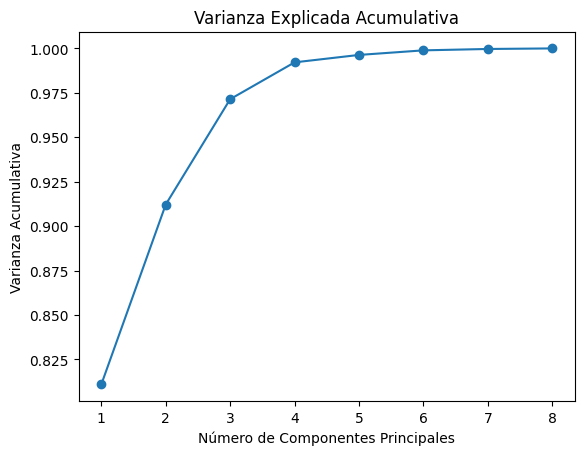

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df_nuevo
y = df2['PIc50']

# Normalizar los datos
X_normalized = df_nuevo

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Mostrar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza explicada acumulativa
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Explicada Acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa')
plt.show()


In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
explained_variance_ratio.shape # nos muestra la misma cantidad de variables

(8,)

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
print(explained_variance_ratio) # nos muestra la misma cantidad de variables

[8.10918842e-01 1.01240119e-01 5.92800230e-02 2.07189517e-02
 4.18002821e-03 2.57202563e-03 7.80044191e-04 3.09966268e-04]


In [ ]:
pca_out = PCA(n_components=8).fit(X_normalized)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([8.10918842e-01, 1.01240119e-01, 5.92800230e-02, 2.07189517e-02,
       4.18002821e-03, 2.57202563e-03, 7.80044191e-04, 3.09966268e-04])

In [ ]:
# **d. Varianza y varianza acumulada por las nuevas componentes principales**
var_exp = pd.DataFrame({'Varianza':pca_out.explained_variance_ratio_, 'Varianza_acumulada':np.cumsum(pca_out.explained_variance_ratio_)})
var_exp

,Varianza,Varianza_acumulada
0,0.810919,0.810919
1,0.101240,0.912159
2,0.059280,0.971439
3,0.020719,0.992158
4,0.004180,0.996338
5,0.002572,0.998910
6,0.000780,0.999690
7,0.000310,1.000000


In [ ]:
# Cumulative proportion of variance (from PC1 to PC6)
np.cumsum(pca_out.explained_variance_ratio_)

array([0.81091884, 0.91215896, 0.97143898, 0.99215794, 0.99633796,
       0.99890999, 0.99969003, 1.        ])

In [ ]:
# **e. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 70%', np.where((var_exp>0.7)&(var_exp<0.75)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 80%', np.where((var_exp>0.8)&(var_exp<0.85)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 95%', np.where((var_exp>0.9)&(var_exp<0.95)))

Cuantas componentes me explican mas del 60% de la varianza pero menos del 70% (array([], dtype=int64), array([], dtype=int64))
Cuantas componentes me explican mas del 60% de la varianza pero menos del 80% (array([0, 0]), array([0, 1]))
Cuantas componentes me explican mas del 60% de la varianza pero menos del 95% (array([1]), array([1]))


In [ ]:
# **f. Usamos la libreria donde esta la componente principal**

from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca2 = PCA(n_components = 3) # n_components = 2

# Obtenemos los componentes principales

X_std_pca3 = pca2.fit_transform(X_pca) # hace lo solicitado a la base de datos

# veamos lo que hizo nos da dos nuevas columnas
X_std_pca3

array([[ 2.84166974e-01,  2.13771329e-01, -1.21122843e+00],
       [ 8.00751212e-01, -1.37115611e+00,  1.02652887e+00],
       [-1.87167685e+00, -4.52249301e-01, -8.17827765e-01],
       [-1.73449964e+00,  3.51081983e-01,  6.36243307e-01],
       [ 8.25448091e+00,  1.22490457e-01,  1.75434202e+00],
       [ 4.77669008e+00,  4.10260725e-01, -1.77413140e+00],
       [ 2.32213276e+00, -4.60734974e-01,  7.93420001e-01],
       [ 1.20888488e+00, -4.02851912e-01, -9.02321829e-01],
       [-7.68027980e-01,  9.17618291e-01, -2.07406810e-01],
       [ 1.40017835e+00, -2.44042375e+00,  2.28633344e-03],
       [ 1.02053449e+00, -5.42847691e-02,  7.16814844e-02],
       [-2.50326535e+00, -2.90818833e-01,  2.89415021e-01],
       [-1.79335058e+00,  8.72600273e-01,  7.12024855e-01],
       [-2.69683174e+00,  4.80937958e-01,  1.57362904e-01],
       [-6.87347375e-01,  3.17774709e-01, -2.78766560e-01],
       [-3.00788922e-01,  1.74588554e-02,  9.52281399e-01],
       [-6.26384381e-01, -2.71970893e-01

In [ ]:
# **g. Las dimensiones de la matriz**
X_std_pca3.shape # Tenemos menos variables que las originales

(60, 3)

In [ ]:
# **h. Varianza explicada por las componentes elegidas**
print('Cuanto explica cada componente elegida',pca2.explained_variance_ratio_)
print( 'Cuanto explica la suma de las componentes elegidas', np.sum(pca.explained_variance_ratio_))

Cuanto explica cada componente elegida [0.81091884 0.10124012 0.05928002]
Cuanto explica la suma de las componentes elegidas 1.0


In [ ]:
# **i. Cantidad de variables de las originales**
pca2.components_# Pesos o coeficientes que nos muestra cuanto de cada variable original tienen nuestras nuevas variables

array([[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  3.33066907e-16,
        -1.11022302e-16, -1.38777878e-17, -4.85722573e-17,
        -8.67361738e-18,  1.73472348e-18],
       [ 0.00000000e+00, -3.49010883e-16,  1.00000000e+00,
        -2.44209929e-17, -8.82381023e-16, -3.03464221e-17,
        -2.44310636e-16, -3.41455150e-16]])

In [ ]:
# **i. Cantidad de variables de las originales**
pca2.components_.shape # Nos muestra que son tres variables combinado las 9

(3, 8)

In [ ]:
# **j. Varianza acumulada**
cumVar = pd.DataFrame(np.cumsum(pca2.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca2.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3"})

,VarPerc,cumVarPerc
PC1,81.091884,81.091884
PC2,10.124012,91.215896
PC3,5.928002,97.143898


In [ ]:
# **k. Matrices de las componentes principales**
pd.DataFrame(pca2.components_.T)
list_namepca = [f'PC{i}' for i in range(1,4)]
df_pca_loading = pd.DataFrame(pca2.components_.T, columns = list_namepca)
df_pca_loading

,PC1,PC2,PC3
0,1.0,-0.000000e+00,0.000000e+00
1,0.0,1.000000e+00,-3.490109e-16
2,-0.0,3.330669e-16,1.000000e+00
3,-0.0,-1.110223e-16,-2.442099e-17
4,-0.0,-1.387779e-17,-8.823810e-16
5,-0.0,-4.857226e-17,-3.034642e-17
6,-0.0,-8.673617e-18,-2.443106e-16
7,-0.0,1.734723e-18,-3.414552e-16


# **La gráfica te mostrará cuánta varianza se explica al usar diferentes números de componentes principales. Puedes seleccionar el número de componentes principales basándote en la cantidad de varianza que deseas conservar. Luego, procederemos a construir un modelo de regresión utilizando machine learning:**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df_nuevo
Y = df2['PIc50']

X

,ATS1v,AATSC8v,AATSC5i,nBonds,SP-2,MPC2,SRW4,WPOL
0,0.395436,-0.223333,1.048395,0.150614,0.236614,0.213204,0.277180,0.391498
1,0.104367,1.550437,-1.064188,0.150614,0.129108,0.006878,0.104364,0.032874
2,-0.734412,0.054325,1.374221,-0.635200,-0.568589,-0.612102,-0.627351,-0.684375
3,-0.427527,-0.633077,-0.119868,-0.635200,-0.919996,-0.818428,-0.821374,-0.684375
4,1.611022,1.547556,-4.129670,2.900966,3.540406,3.101774,2.814285,3.619119
5,0.913069,0.398455,0.192512,2.115151,2.910641,2.276468,2.168536,2.005309
6,0.195968,0.919305,-1.428091,0.936429,1.391675,0.832183,0.932978,0.212186
7,0.058387,0.572977,0.521017,0.543522,0.950932,0.625857,0.693383,0.391498
8,-0.271114,-1.055614,0.313865,-0.242293,-0.058212,-0.199449,-0.162156,-0.325751
9,0.466425,2.657382,-0.135730,0.543522,0.122054,0.213204,0.362192,0.570811


In [ ]:
# Dividimos los datos en trian y test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
X_train.head()
print('Muestras de entrenamiento: ',X_train.shape[0])

Muestras de entrenamiento:  36


In [ ]:
X_test


,ATS1v,AATSC8v,AATSC5i,nBonds,SP-2,MPC2,SRW4,WPOL
31,-0.592122,0.684910,0.533924,-0.635200,-0.649368,-0.612102,-0.627351,-0.505063
42,1.631133,0.044331,-0.944751,1.722244,1.024837,1.038510,1.241545,0.929435
34,-0.351709,0.063782,0.360207,0.150614,0.129108,0.006878,0.104364,0.032874
52,-0.592122,0.654111,0.305408,-0.635200,-0.568589,-0.612102,-0.627351,-0.684375
56,0.119378,-0.303991,-0.157989,0.543522,0.210850,0.419530,0.529522,0.032874
19,-0.508791,-0.459279,0.815266,-0.635200,-0.568589,-0.612102,-0.627351,-0.684375
43,1.957100,-0.244146,-1.315059,2.115151,1.443498,1.451162,1.611052,1.467372
26,0.021958,-2.012125,0.119087,0.150614,0.227129,0.213204,0.277180,0.391498
23,0.746926,-1.365256,0.148179,0.543522,0.537045,0.625857,0.693383,1.108747
28,-0.066940,-0.942754,0.426890,0.150614,0.227129,0.213204,0.277180,0.391498


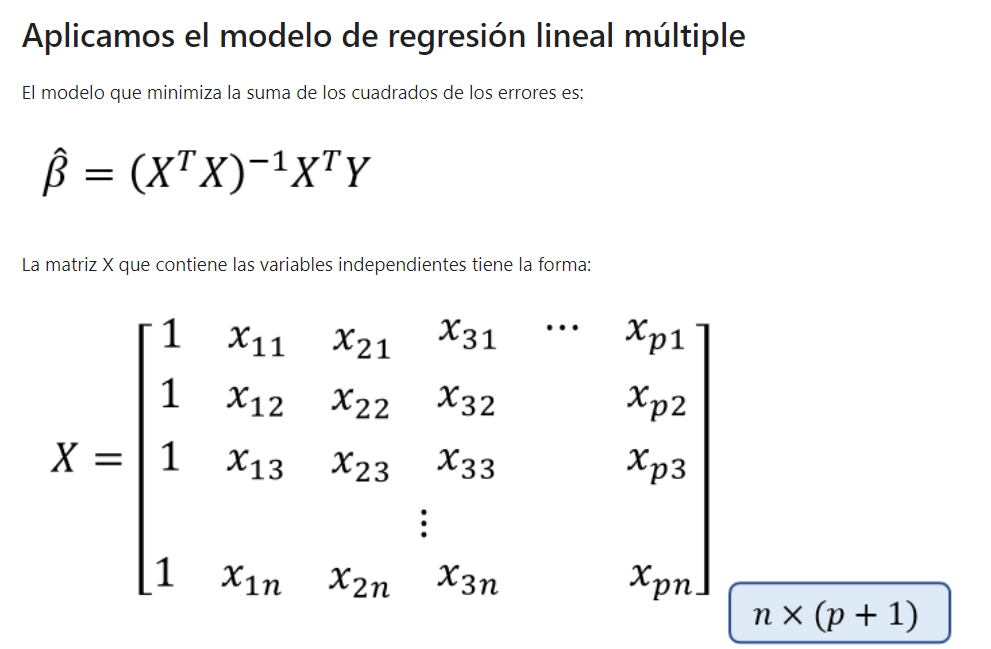

In [ ]:

# Creamos un arreglo de números 1 y le agregamos la matriz X
c1_mat = np.array(np.ones((X_train.shape[0],1)))
X_mat = np.append(c1_mat,X_train.values,axis=1)
X_mat

array([[ 1.        ,  0.27042663, -0.48588092, -0.8268737 ,  0.15061448,
        -0.1420743 , -0.19944887, -0.07231432, -0.14643833],
       [ 1.        ,  2.42821797,  1.57309247, -1.72678314,  1.72224381,
         1.56886287,  2.07014171,  1.96405849,  1.6466841 ],
       [ 1.        ,  0.16424839,  0.23402899,  0.48266976,  0.15061448,
         0.26873411,  0.21320396,  0.27718015,  0.3914984 ],
       [ 1.        , -0.734412  ,  0.38762188, -0.27239232, -0.63520019,
        -0.64182308, -0.6121017 , -0.62735095, -0.50506282],
       [ 1.        , -0.85471311, -0.12520724,  0.45854454, -1.02810752,
        -1.05124421, -1.02475454, -1.12163846, -1.04299955],
       [ 1.        , -0.59212198, -0.89563989,  0.72169332, -0.63520019,
        -0.55934847, -0.6121017 , -0.62735095, -0.68437506],
       [ 1.        , -0.734412  , -0.27323139,  1.2665668 , -0.63520019,
        -0.55934847, -0.6121017 , -0.62735095, -0.68437506],
       [ 1.        ,  0.46642506,  0.24791813, -0.35235292,  0

In [ ]:
# Realizamos las operaciones del modelo
# Calculamos X transpuesta
X_matT =  X_mat.transpose()

# Calculamos la inversa de la multiplicación X*XT
X_inv = np.linalg.inv(np.matmul(X_matT,X_mat))

# Calculamos la multiplicación XT*Y
X_matTY = np.matmul(X_matT,Y_train)

# Finalmente encontramos los parámetros multiplicando los dos resultados anteriores
Beta = np.matmul(X_inv,X_matTY)

print('B0 = {}, B1 ={}, B2 = {}, B3 = {}, B4 = {}, B5 = {}, B6 = {}, B7 ={}, B8 = {}'.format(Beta[0],Beta[1],Beta[2],Beta[3],Beta[4],Beta[5],Beta[6],Beta[7],Beta[8]))

B0 = 6.0839409123623795, B1 =0.03707271638350666, B2 = 0.0856320594843501, B3 = 0.14851079562481517, B4 = -3.222729968085998, B5 = 0.6318513245279094, B6 = -0.6021329103394965, B7 =1.8202738518373127, B8 = 1.2768797197696298


In [ ]:
# Probamos con una entrada nueva
#['ATSC7c', 'AATSC6s', 'WTPT-1', 'Zagreb', 'WTPT-2']
# 0.4	        0.07	      60	      180   	2.2
#x_in = np.array([1, 0.4, 0.07, 60,	180,	2.2])
#MedV = np.dot(x_in,Beta)
#MedV

In [ ]:
# Definimos el modelo
linear_model = LinearRegression()

In [ ]:
# Realizamos el entrenamiento (Ajuste de parámeetros)
linear_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:

# Identificamos los coeficientes
coeficientes = linear_model.coef_
intercepto = linear_model.intercept_

print('B0 = {}, B1 ={}, B2 = {}, B3 = {}, B4 = {}, B5 = {}, B6 = {}, B7 ={}'.format(intercepto,
                                                                   coeficientes[0],coeficientes[1],
                                                                   coeficientes[2],coeficientes[3],
                                                                   coeficientes[4],coeficientes[5],coeficientes[6],
                                                                   coeficientes[7],))

B0 = 6.083940912362415, B1 =0.03707271638373943, B2 = 0.08563205948435462, B3 = 0.14851079562483083, B4 = -3.2227299680862322, B5 = 0.6318513245277144, B6 = -0.60213291033957, B7 =1.820273851837469


In [ ]:
# Probamos con una entrada nueva
#['ATSC7c', 'AATSC6s', 'WTPT-1', 'Zagreb', 'WTPT-2']
# 0.4	        0.07	      60	      180   	2.2
#x_in = np.array([0.4, 0.07, 60,	180,	2.2])
#MedV = linear_model.predict(x_in.reshape((1, X_test.shape[1])))
#MedV

In [ ]:
# Evaluamos el desempeño con los datos completos
R2 = linear_model.score(X,Y)
y_predict = linear_model.predict(X)
RMSE = (np.sqrt(mean_squared_error(Y, y_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)

coeficiente de determinación R^2:  -0.04053336452236089
Rmse  0.8019858511156124


In [ ]:
# Evaluamos el desempeño con los datos de netrenamiento
R2 = linear_model.score(X_train,Y_train)
#R2 = linear_model.score(X,Y)
y_predict = linear_model.predict(X_train)
RMSE = (np.sqrt(mean_squared_error(Y_train, y_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)

coeficiente de determinación R^2:  0.1534126008548622
Rmse  0.751726119239685


In [ ]:
# Evaluamos el desempeño con los datos de prueba
R2 = linear_model.score(X_test,Y_test)
#R2 = linear_model.score(X_train,Y_train)
#R2 = linear_model.score(X,Y)
y_test_predict = linear_model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)


coeficiente de determinación R^2:  -0.4770850647725142
Rmse  0.871960449764407


In [ ]:
pd.DataFrame(y_test_predict)

NameError: name 'pd' is not defined

In [ ]:
pd.DataFrame(Y_test)

,PIc50
31,6.853872
42,5.721246
34,7.602060
52,5.508638
56,5.494850
19,6.795880
43,6.173925
26,7.200659
23,6.649752
28,6.835647


In [ ]:
Y_test-y_test_predict

31    0.435453
42    1.794719
34    1.648208
52   -0.695287
56    0.321139
19    0.608488
43    2.205700
26    0.736336
23   -0.255719
28    0.237335
21    0.913797
44   -0.124376
3     0.210211
17   -0.070734
6     0.250162
40    0.087463
2    -0.850087
29    0.808565
59   -0.771261
24    0.320773
4    -1.126105
25    0.555554
0     0.525677
5    -0.858678
Name: PIc50, dtype: float64

In [ ]:
# **e. Separación datos train-test**
# ==============================================================================
steps = 15
datos_train = Y[:-steps]
datos_test  = Y[-steps:]
y_test_predict.plot(ax=ax, label='predict')
fig, ax = plt.subplots(figsize=(10, 3.5))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')

ax.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'